<a href="https://colab.research.google.com/github/AK2299/sentiment-analysis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
'Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.'


import numpy as np
import pandas as pd
from textblob import TextBlob
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [12]:
#load the dataset

df = pd.read_csv('/content/insagram_reviews_by_playstore.csv')
df = df.head(50000)
df.head()

,review_description,rating,review_date
0,"The app is good for connecting with friends, f...",3.0,7/11/2023 23:57
1,"Used to be my favorite social media app, but ""...",2.0,7/22/2023 21:37
2,Instagram is the best of all the social media....,5.0,7/25/2023 3:24
3,"I love this app.. but as of late, I have been ...",2.0,7/9/2023 4:49
4,Used to be a great app but there are so many m...,3.0,7/17/2023 16:47


In [15]:
rows, cols = df.shape
print(f"There are {rows} and {cols} columns in dataset")

There are 50000 and 3 columns in dataset


In [16]:
#Find and Remove Duplicate data
print(f"There are {df.duplicated().sum()} duplicate values")
df = df.drop_duplicates()

There are 1 duplicate values


In [17]:
df['review_description'][0]

"The app is good for connecting with friends, family and even potential business partners. However as of recently I've experienced some problems with the messages portion of the app (ex: themes aren't showing up on my end but are present on other person's end). Idk if it has to do with a bug but it happened all of sudden out of nowhere on both of my pages (one private the other public). But besides the occasional bugs and sometimes the app/website being down randomly, I say it's a decent app."

In [21]:
#Data Cleaning
#Data Cleaning
for index, row in df.iterrows():
    df.loc[index, 'review_description'] = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?","",row['review_description'])

In [22]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rating,49999.0,2.234705,1.47485,1.0,1.0,2.0,3.0,5.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49999 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review_description  49999 non-null  object 
 1   rating              49999 non-null  float64
 2   review_date         49999 non-null  object 
dtypes: float64(1), object(2)
memory usage: 2.5+ MB


In [24]:
#Null Values
df.isna().sum()


,0
review_description,0
rating,0
review_date,0


In [25]:
#Function to classify Sentiment Score
def analyze(x):
        if(x>=0.5):
            return "Positive"
        elif x<=-0.5:
            return "Negative"
        else:
            return "Neutral"

In [26]:
#Function to calculate sentiment score using TextBlob
def score(x):
        blob = TextBlob(x)
        return blob.sentiment.polarity

In [27]:
df['score']=df['review_description'].apply(score)
df['analysis']=df['score'].apply(analyze)
df.head()

,review_description,rating,review_date,score,analysis
0,The app is good for connecting with friends fa...,3.0,7/11/2023 23:57,0.054365,Neutral
1,Used to be my favorite social media app but im...,2.0,7/22/2023 21:37,-0.138148,Neutral
2,Instagram is the best of all the social media ...,5.0,7/25/2023 3:24,0.310648,Neutral
3,I love this app but as of late I have been hav...,2.0,7/9/2023 4:49,0.087500,Neutral
4,Used to be a great app but there are so many m...,3.0,7/17/2023 16:47,0.109686,Neutral


In [28]:
df['analysis'].unique()

array(['Neutral', 'Negative', 'Positive'], dtype=object)

In [29]:
df["rating"].value_counts()


,count
rating,
1.0,24568
2.0,7532
5.0,6915
3.0,6410
4.0,4574


<BarContainer object of 49999 artists>

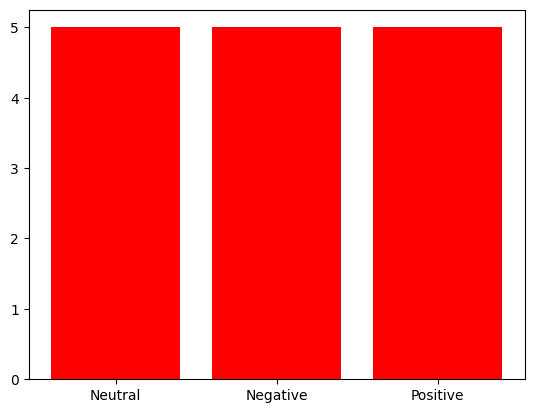

In [30]:
# Plotting a barplot to check relation between analysis and rating.
plt.bar(df['analysis'],df['rating'],color ='r')

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,49999.0,2.234705,1.474850,1.0,1.00000,2.000,3.000000,5.0
score,49999.0,0.068166,0.290133,-1.0,-0.07381,0.025,0.215871,1.0


In [32]:
df.describe(include='object').T

,count,unique,top,freq
review_description,49999,49969,Not working properly,7
review_date,49999,44498,5/21/2023 22:46,14
analysis,49999,3,Neutral,43752


In [33]:
#Define a rating function to classify rating.¶
def rating(x):
    if x>=8 and x<=10:
        return 'Positive'
    elif x>=4 and x<=7:
         return 'Neutral'
    else:
         return 'Negative'

In [34]:
df['rating_analysis']=df['rating'].apply(rating)
df['final_rating'] = 'Positive'

In [36]:
for index, row in df.iterrows():
    if (row['analysis']=='Positive' and row['rating_analysis'] == 'Positive'):
        df.loc[index, 'final_rating'] = 'Positive'

    elif (row['analysis'] == 'Positive' and row['rating_analysis'] == 'Neutral')or (row['analysis'] == 'Neutral' and row['rating_analysis'] == 'Positive'):
        df.loc[index, 'final_rating'] = 'Positive'

    elif (row['analysis'] == 'Negative' and row['rating_analysis'] == 'Neutral')or (row['analysis'] == 'Neutral' and row['rating_analysis'] == 'Negative'):
        df.loc[index, 'final_rating'] = 'Neutral'

    elif (row['analysis'] == 'Neutral' and row['rating_analysis'] == 'Neutral'):
        df.loc[index, 'final_rating'] = 'Neutral'

    elif (row['analysis'] == 'Negative' and row['rating_analysis'] == 'Negative'):
        df.loc[index, 'final_rating'] = 'Negative'

    else:
        df.loc[index, 'final_rating'] = 'Neutral'

In [37]:
df.head()

,review_description,rating,review_date,score,analysis,rating_analysis,final_rating
0,The app is good for connecting with friends fa...,3.0,7/11/2023 23:57,0.054365,Neutral,Negative,Neutral
1,Used to be my favorite social media app but im...,2.0,7/22/2023 21:37,-0.138148,Neutral,Negative,Neutral
2,Instagram is the best of all the social media ...,5.0,7/25/2023 3:24,0.310648,Neutral,Neutral,Neutral
3,I love this app but as of late I have been hav...,2.0,7/9/2023 4:49,0.087500,Neutral,Negative,Neutral
4,Used to be a great app but there are so many m...,3.0,7/17/2023 16:47,0.109686,Neutral,Negative,Neutral


In [38]:
df.tail()

,review_description,rating,review_date,score,analysis,rating_analysis,final_rating
49995,App is getting crash every time I watch insta ...,1.0,6/22/2023 7:04,0.000000,Neutral,Negative,Neutral
49996,The lastest update wont let me see ANY picture...,1.0,10/25/2019 3:05,0.377778,Neutral,Negative,Neutral
49997,Really like instagram But recently the app has...,1.0,11/14/2019 5:39,0.040000,Neutral,Negative,Neutral
49998,I dont know why but a few days ago it just com...,3.0,6/29/2022 18:06,-0.088889,Neutral,Negative,Neutral
49999,App has been shutting me out of one of my acco...,1.0,8/13/2022 19:06,-0.037727,Neutral,Negative,Neutral


In [39]:
df['final_rating'].unique()

array(['Neutral', 'Negative', 'Positive'], dtype=object)

<Axes: xlabel='final_rating', ylabel='count'>

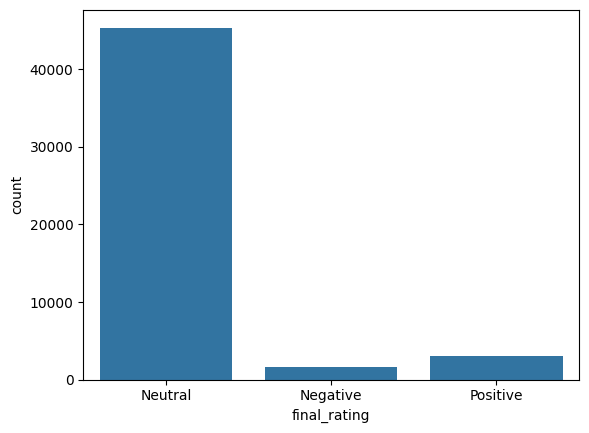

In [40]:
sns.countplot(x='final_rating',data =df)